In [28]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata
from scipy.spatial.distance import pdist, squareform

import json
import os
import re

The dataset can be found here: http://people.csail.mit.edu/jrennie/20Newsgroups/20news-bydate.tar.gz

In [29]:
# - Load dataset 
dataset_train = load_files("20news-bydate-train",
                            encoding="utf-8", decode_error="replace")

# I have idea to test this, but ... :)
# dataset_test = load_files("20news-bydate-test", encoding="utf-8", decode_error="replace")

In [30]:
# We have dataset structure and classes
print(dataset_train.keys())

for x in dataset_train.target_names:
    print(x)
    
regex = r"(^|\n)Subject: ([^\n]+)"
DN_train = []

for text in dataset_train.data:
    DN_train.append(re.search(regex, text, re.MULTILINE).group(2))
DN_train

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
alt.atheism
comp.graphics
misc.forsale


['Re: Ancient islamic rituals',
 'WARRIORS TICKETS FOR SALE',
 'Need some Graphics Help!',
 'Re: DMORPH',
 'Game Boy games wanted!',
 'Wargames/magazines Forsale',
 'Moving Sale',
 'Translating TTTDDD to DXF or Swiv3D.',
 'Grayscale Printer',
 'INFINITY RS-6903 6"x9" Speakers For Sale (BRAND NEW)',
 'Re: Why is sex only allowed in marriage: Rationality (was: Islamic marriage)?',
 'Re: Please Recommend 3D Graphics Library For Mac.',
 'Re: Death Penalty / Gulf War',
 'What is reverse or negative video?',
 'ST (TOS) and SF Movie Videotapes (BETA) for Sale/Trade [repost]',
 'Marvel, DC, Valiant, Image, etc.. For Sale',
 'Re: Political Atheists?',
 'Sony Receiver and Ten Disc changer for sale!',
 'Re: Ancient islamic rituals',
 'Re: Ancient islamic rituals',
 'disp135 [0/7]',
 'SciP+Fi: fiction set in Comp-Science\\ programming environs',
 'Re: Death Penalty / Gulf War (long)',
 'Re: Benediktine Metaphysics',
 '84 Mazda Pickup, (College Pro, Student Painters, LOOK.)',
 'Re: Ancient islamic 

In [31]:
# Manipulations for dataset


In [32]:
vectorizer = TfidfVectorizer(max_df=0.5, 
                             min_df=2, 
                             stop_words='english')

In [33]:
X_train = vectorizer.fit_transform(dataset_train.data)
X_test = vectorizer.fit_transform(dataset_train.data)

In [34]:
print(X_train.shape)

(30, 1093)


In [35]:
pca = TruncatedSVD(n_components=2)
X2_train = pca.fit_transform(X_train)

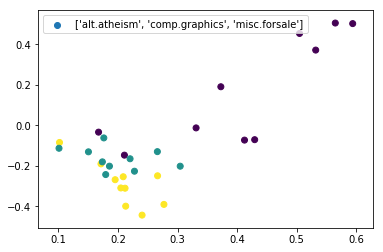

In [36]:
Y = dataset_train.target
plt.scatter(X2_train[:,0], X2_train[:,1], c=Y, label=dataset_train.target_names)
plt.legend()

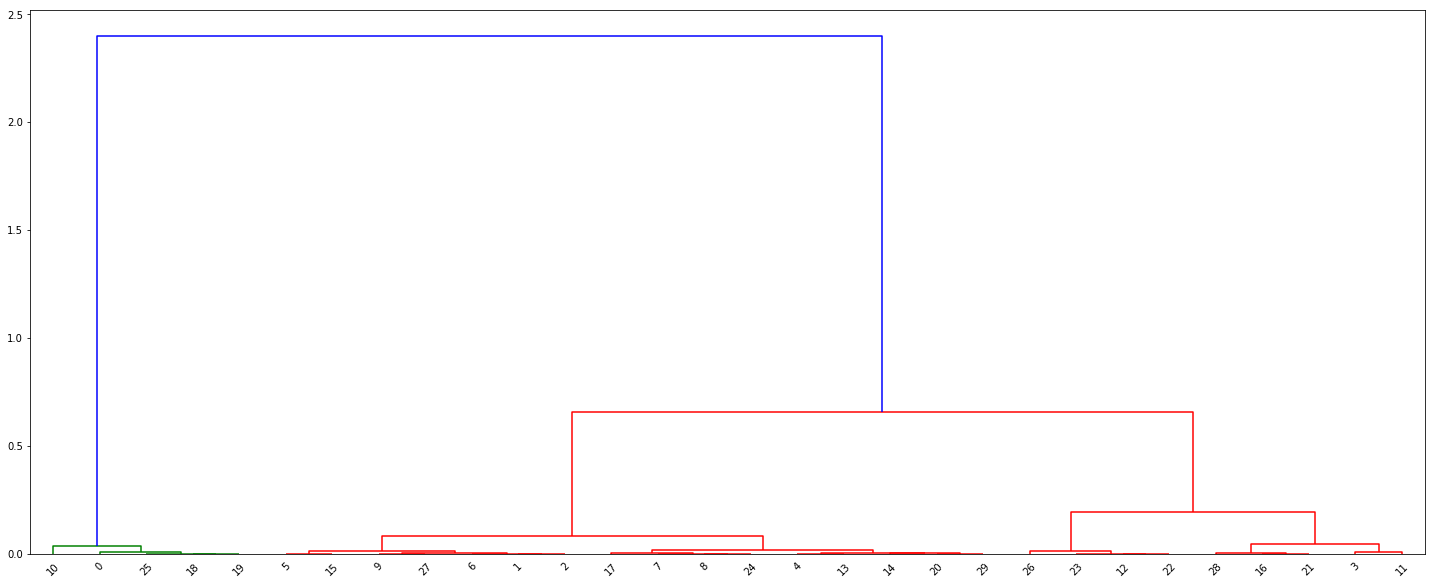

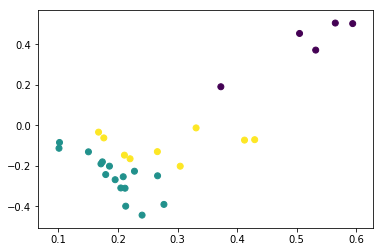

In [37]:
P = pdist(X2_train, 'cosine')
Z = linkage(P, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

W = fcluster(Z, t=3, criterion='maxclust')
plt.scatter(X2_train[:,0], X2_train[:,1], c=W, label=dataset_train.target_names)
plt.show()

In [66]:
# Make js file for tree structure
l = X_train.shape[0]
n = Z.shape[0]
trees = [None] * (l + n)
for i in range(0, l):
    trees[i] = {'name': DN_train[i],
                'class': 'node-' + str(Y[i]+1)}
    
for i in range(0, n):
    curVert = Z[i]
    newInd = l+i
    numOfObjs = int(curVert[3])
    dist = int(curVert[2] * 10000) 
    lst = [trees[int(curVert[0])], trees[int(curVert[1])]]
    trees[newInd] = {'name' : "" + str(numOfObjs) + "\n" + str(dist) + "", 
                     'class': 'node-0 fas',
                    'children' : lst}
tree = trees[l+n-1]
f = open("treeData.js", "w+")
js = "var treeData = " + json.dumps(tree) + ";"
f.write(js)
f.close()

In [47]:
from IPython.core.display import display, HTML
display(HTML(filename='tree.html'))

We have classes: 				 [0 2 1 1 2 2 2 1 1 2 0 1 0 1 2 2 0 2 0 0 1 1 0 0 2 0 0 2 1 1]
Here classes for agglomerative clustering: 	 [0 1 1 2 1 1 1 1 1 1 0 2 2 1 1 1 2 1 0 0 1 2 2 2 1 0 2 1 2 1]


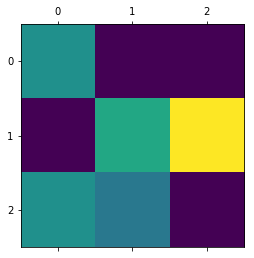

[[ 5.  0.  0.]
 [ 0.  6. 10.]
 [ 5.  4.  0.]]
So we have Travelling salesman problem (TSP) Lol:)
For example Q _test(0-0, 1-1, 2-2) =  0.36666666666666664


In [39]:
print('We have classes: \t\t\t\t', Y)
print('Here classes for agglomerative clustering: \t', W-1)

Matrix = np.zeros(9).reshape((3, 3))
Pairs = np.concatenate(([W-1], [Y])).T
for pair in Pairs:
    row = pair[0]
    col = pair[1]
    Matrix[row,col] += 1
    
plt.matshow(Matrix)
plt.show()
print(Matrix)

print('So we have Travelling salesman problem (TSP) Lol:)')
print('For example Q _test(0-0, 1-1, 2-2) = ',  sum(W == Y+1)/len(W))